## Question 1. dlt Version

In this homework, we will load the data from our FAQ to Qdrant

Let's install dlt with Qdrant support and Qdrant client:

```bash
pip install -q "dlt[qdrant]" "qdrant-client[fastembed]"
```

What's the version of dlt that you installed?

In [1]:
from dlt.destinations import qdrant

pip install -q "dlt[qdrant]" "qdrant-client[fastembed]"

Note: you may need to restart the kernel to use updated packages.


In [3]:
import dlt

In [4]:
print(dlt.__version__)

1.13.0


## dlt Resourse

For reading the FAQ data, we have this helper function:

```python
def zoomcamp_data():
    docs_url = 'https://github.com/alexeygrigorev/llm-rag-workshop/raw/main/notebooks/documents.json'
    docs_response = requests.get(docs_url)
    documents_raw = docs_response.json()

    for course in documents_raw:
        course_name = course['course']

        for doc in course['documents']:
            doc['course'] = course_name
            yield doc
```

Annotate it with `@dlt.resource`. We will use it when creating
a dlt pipeline.

In [9]:
import requests

In [10]:
@dlt.resource(name='zoomcamp_faq')
def zoomcamp_data():
    docs_url = 'https://github.com/alexeygrigorev/llm-rag-workshop/raw/main/notebooks/documents.json'
    docs_response = requests.get(docs_url)
    documents_raw = docs_response.json()

    for course in documents_raw:
        course_name = course['course']

        for doc in course['documents']:
            doc['course'] = course_name
            yield doc

## Question 2. dlt pipeline

Now let's create a pipeline. 

We need to define a destination for that. Let's use the `qdrant` one:

```python
from dlt.destinations import qdrant

qdrant_destination = qdrant(
  qd_path="db.qdrant", 
)
```

In this case, we tell dlt (and Qdrant) to create a folder with
our data, and the name for it will be `db.qdrant`

Let's run it:

```python
pipeline = dlt.pipeline(
    pipeline_name="zoomcamp_pipeline",
    destination=qdrant_destination,
    dataset_name="zoomcamp_tagged_data"

)
load_info = pipeline.run(zoomcamp_data())
print(pipeline.last_trace)
```

How many rows were inserted into the `zoomcamp_data` collection?

Look for `"Normalized data for the following tables:"` in the trace output.

In [11]:
from dlt.destinations import qdrant

qdrant_destination = qdrant(
  qd_path="db.qdrant", 
)

In [12]:
pipeline = dlt.pipeline(
    pipeline_name="zoomcamp_pipeline",
    destination=qdrant_destination,
    dataset_name="zoomcamp_tagged_data"

)
load_info = pipeline.run(zoomcamp_data())
print(pipeline.last_trace)

Run started at 2025-07-10 06:57:48.114037+00:00 and COMPLETED in 15.66 seconds with 4 steps.
Step extract COMPLETED in 1.14 seconds.

Load package 1752130669.0790093 is EXTRACTED and NOT YET LOADED to the destination and contains no failed jobs

Step normalize COMPLETED in 0.06 seconds.
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- zoomcamp_faq: 948 row(s)

Load package 1752130669.0790093 is NORMALIZED and NOT YET LOADED to the destination and contains no failed jobs

Step load COMPLETED in 13.50 seconds.
Pipeline zoomcamp_pipeline load step completed in 13.49 seconds
1 load package(s) were loaded to destination qdrant and into dataset zoomcamp_tagged_data
The qdrant destination used /home/sparsh-raj/PycharmProjects/LLMZoomcamp/dlt-Cognee-workshop/dlt-cognee/db.qdrant location to store data
Load package 1752130669.0790093 is LOADED and contains no failed jobs

Step run COMPLETED in 15.66 seconds.
Pipeline zoomcamp_pipeline load step completed in 13.49 seco

## Question 3. Embeddings

When inserting the data, an embedding model was used. Which one?

You can find this out by inspecting the `meta.json` file created
in the target folder. During the data insertion process, a folder named db.qdrant will be created, and the meta.json file will be located inside this folder.

Ans: 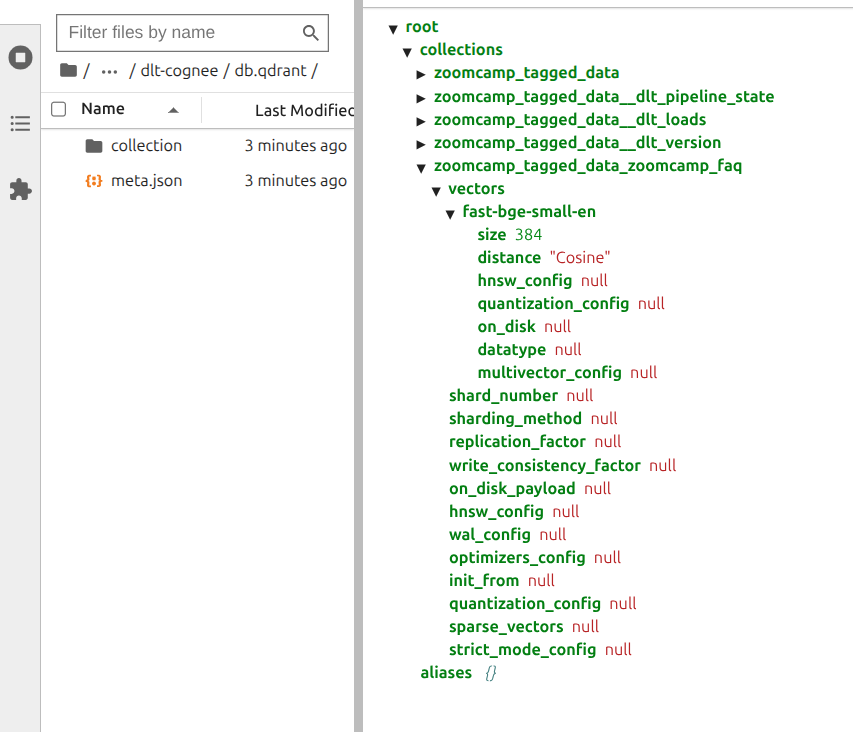